In [3]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.utils import HDF5Matrix
import warnings
warnings.filterwarnings("ignore")

sys.path.insert(0, "../covidxai/model")
from unet import Unet

In [2]:
WEIGHTS_PATH = "../models/weights/unet_weights.hdf5"
IMG_PATH = "../data/images.hdf5"
LABEL_PATH = "../data/labels.hdf5"

In [4]:
unet = Unet().model
unet.load_weights(WEIGHTS_PATH)
unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
t (InputLayer)                  [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 64) 640         t[0][0]                          
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 256, 256, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [5]:
images = np.array(HDF5Matrix(IMG_PATH, 'validation')) # input val image
labels = np.array(HDF5Matrix(LABEL_PATH, 'validation')) # val label

In [33]:
plt.imshow(tf.squeeze(images[0:1]))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f89fc0a2488> (for post_execute):


ValueError: Unsupported dtype

ValueError: Unsupported dtype

<Figure size 432x288 with 1 Axes>

In [25]:
plt.imshow(tf.squeeze(images[0]))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f89fc0a2488> (for post_execute):


ValueError: Unsupported dtype

ValueError: Unsupported dtype

<Figure size 432x288 with 1 Axes>

TypeError: Invalid dimensions for image data

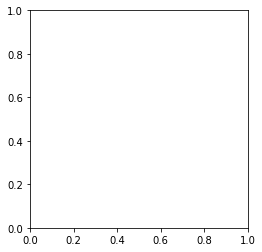

In [19]:
plt.imshow(unet.predict(images[0:1])[0])